In [43]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Normal distribution

DataFrame contains normal distribution with different parameters was created.

In [44]:
normalDistribution = {
    "default":np.random.normal(size=100000),
    "mean5_var1":np.random.normal(loc=5,scale=1,size=100000),
    "mean1_var5":np.random.normal(loc=1,scale=5,size=100000)
}

print(normalDistribution)

df = pd.DataFrame(data=normalDistribution)

{'default': array([-0.70530763, -0.85194909, -0.0050795 , ...,  0.44379096,
        1.14400872,  1.7022819 ]), 'mean5_var1': array([4.50974874, 4.45918764, 3.99725027, ..., 4.88522083, 6.01950536,
       5.85131554]), 'mean1_var5': array([-8.67629402, -1.10666868, -5.23468552, ...,  2.39731393,
        4.47486229, -2.69429622])}


Melt function to anable multiple plots

In [45]:
dfmelt = pd.melt(df,var_name='parameters',value_name='Value')
#print(dfmelt)

### Histogram plots for every normal distribution

Value of bins determine estimation of graph, for bigger value, each sample is very small, it allows us to get the real shape of the plot, but it's not always best solution. In the first plot value of bins is equal 512, we can observe that graph isn't smooth and there are some disturbances, which causes unnedeed peaks. In second plot value of bins was decreased to 128 and resolution of graph is still quite good, but there are no unexpected peaks. Of course we can't decrease value of bins too much, because we can lose accuracy, as in case of third plot, where bins is equal 16.


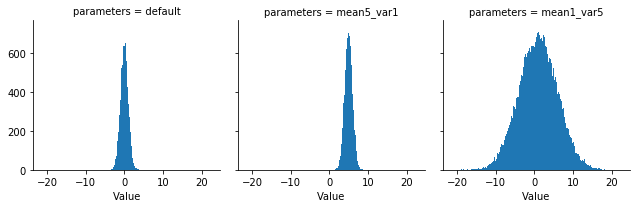

In [46]:
g = sns.FacetGrid(dfmelt,col="parameters",sharex=True)
g.map(plt.hist,'Value',cumulative=False,bins=512)

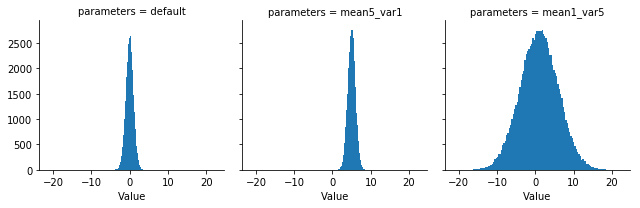

In [47]:
g = sns.FacetGrid(dfmelt,col="parameters",sharex=True)
g.map(plt.hist,'Value',cumulative=False,bins=128)

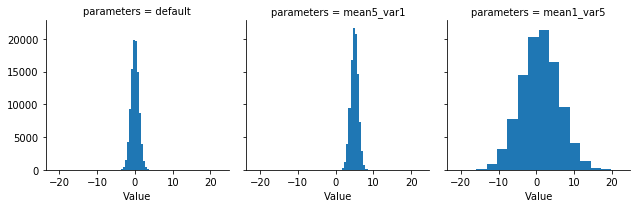

In [48]:
g = sns.FacetGrid(dfmelt,col="parameters",sharex=True)
g.map(plt.hist,'Value',cumulative=False,bins=16)

Histogram plot also allows to use 'cumulative' option. In this case value for each bin is equal counts in that bin plus all bins for smaller values. It might be helpfull if we want to know number of counts lesser than some value. 

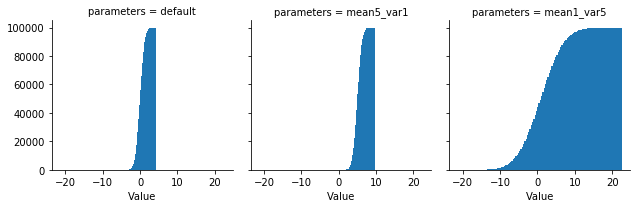

In [49]:
g = sns.FacetGrid(dfmelt,col="parameters",sharex=True)
g.map(plt.hist,'Value',cumulative=True,bins=128)

# Inverse logit

Previously defined normal distributions was transformed with expit function (inverse logit), which is defined as 
- expit(x) = 1/(1+exp(-x))

This function creates a map of probability values from (0,1)

In [50]:
from scipy.special import logit, expit
expit_df = expit(df)

expit_dfmelt = pd.melt(expit_df,var_name='parameters',value_name='Value')
print(dfmelt)

        parameters     Value
0          default -0.705308
1          default -0.851949
2          default -0.005080
3          default -0.588547
4          default -1.258088
...            ...       ...
299995  mean1_var5 -8.943694
299996  mean1_var5  8.285190
299997  mean1_var5  2.397314
299998  mean1_var5  4.474862
299999  mean1_var5 -2.694296

[300000 rows x 2 columns]


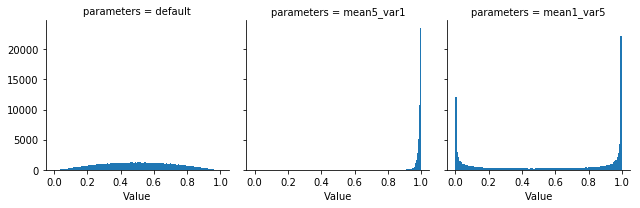

In [51]:
g = sns.FacetGrid(expit_dfmelt,col="parameters",sharex=True)
g.map(plt.hist,'Value',cumulative=False,bins=128)

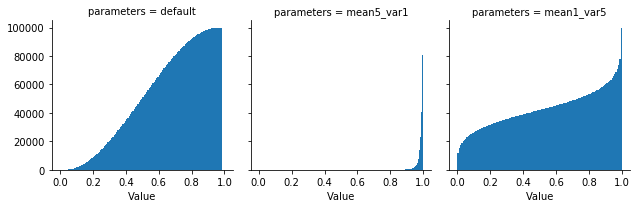

In [52]:
g = sns.FacetGrid(expit_dfmelt,col="parameters",sharex=True)
g.map(plt.hist,'Value',cumulative=True,bins=128)

# Poisson distribution

As in case of normal distribution, DataFrame contains poisson distribution with different parameters was created. In this case we define only expected value. In this case standard deviation is equal to the square root of the expected value. So with increase of expected value, graph getting flatter.

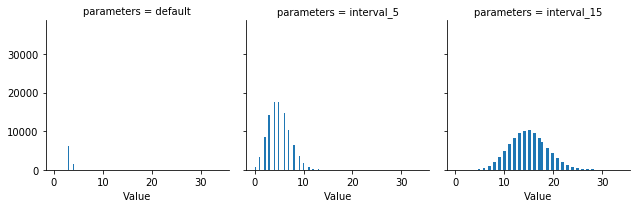

In [53]:
poissonDistribution={
    "default":np.random.poisson(size=100000),
    "interval_5":np.random.poisson(lam=5,size=100000),
    "interval_15":np.random.poisson(lam=15,size=100000),
}

dfPoisson = pd.DataFrame(data=poissonDistribution)

dfPoissonmelt = pd.melt(dfPoisson,var_name='parameters',value_name='Value')


g = sns.FacetGrid(dfPoissonmelt,col="parameters",sharex=True)
g.map(plt.hist,'Value',cumulative=False,bins=64)

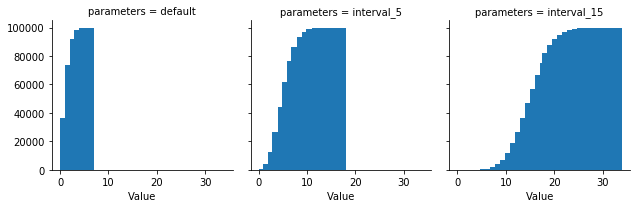

In [54]:
g = sns.FacetGrid(dfPoissonmelt,col="parameters",sharex=True)
g.map(plt.hist,'Value',cumulative=True,bins=64)

# Beta distribution

Beta distribution is continuous probability distributions defined on the interval (0,1). Shape of distribtion is controlled by two parameters. Expected value also depends on them, because it is equal alpha/(alpha+beta). As in previous cases DataFrame contains beta distributions was created. It allows to observe change of shape depanding on value of this parameters.  

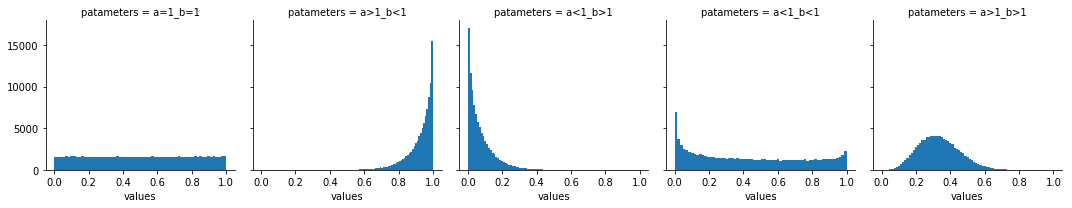

In [55]:
betaDistribution={
    "a=1_b=1":np.random.beta(a=1,b=1,size=100000),
    "a>1_b<1":np.random.beta(a=10,b=0.8,size=100000),
    "a<1_b>1":np.random.beta(a=0.8,b=10,size=100000),
    "a<1_b<1":np.random.beta(a=0.6,b=0.8,size=100000),
    "a>1_b>1":np.random.beta(a=5,b=10,size=100000),
    
}

dfBeta = pd.DataFrame(data=betaDistribution)

dfBetamelt = pd.melt(dfBeta,var_name='patameters',value_name='values')

g = sns.FacetGrid(dfBetamelt,col='patameters',sharex=True)
g.map(plt.hist,'values',cumulative=False,bins=64)



# Log-normal distribution

It is distribution for positive values. Its shape depend on mean and sigma value. As in previous cases DataFrame contains beta distributions was created. This distribution is similar to normal distribution without negative values. 


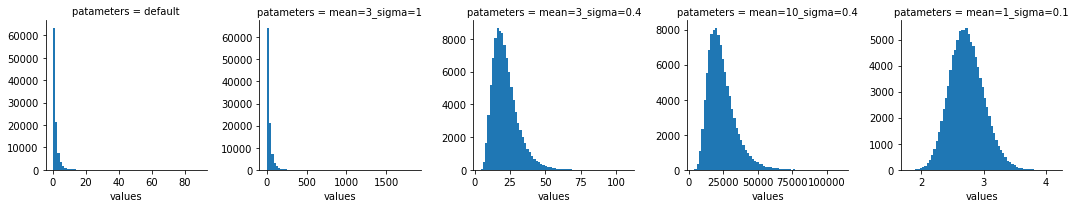

In [56]:
logNormalDistribution={
    "default":np.random.lognormal(size=100000),
    "mean=3_sigma=1":np.random.lognormal(mean=3,sigma=1,size=100000),
    "mean=3_sigma=0.4":np.random.lognormal(mean=3,sigma=0.4,size=100000),
    "mean=10_sigma=0.4":np.random.lognormal(mean=10,sigma=0.4,size=100000),
    "mean=1_sigma=0.1":np.random.lognormal(mean=1,sigma=0.1,size=100000),
    
}

dflogNormal = pd.DataFrame(data=logNormalDistribution)

dflogNormalmelt = pd.melt(dflogNormal,var_name='patameters',value_name='values')

g = sns.FacetGrid(dflogNormalmelt,col='patameters',sharex=False,sharey=False)
g.map(plt.hist,'values',cumulative=False,bins=64)